# Clustering


## $k$-means

O algoritmo $k$-means procura por um número predeterminado de grupos (*clusters*) em um conjunto de dados multidimensionais não rotulados. Isso é feito usando uma concepção simples da aparência do cluster ideal:

* O "centro do cluster" é a média aritmética de todos os pontos pertencentes ao cluster.
* Cada ponto está mais próximo de seu próprio centro de cluster do que de outros centros de cluster.

A figura a seguir ([fonte](http://shabal.in/visuals/kmeans/2.html)) ilustra o comportamento do $k$-means durante a formação dos grupos 
![alt text](http://shabal.in/visuals/kmeans/left.gif)

### Classe sklearn.cluster.KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

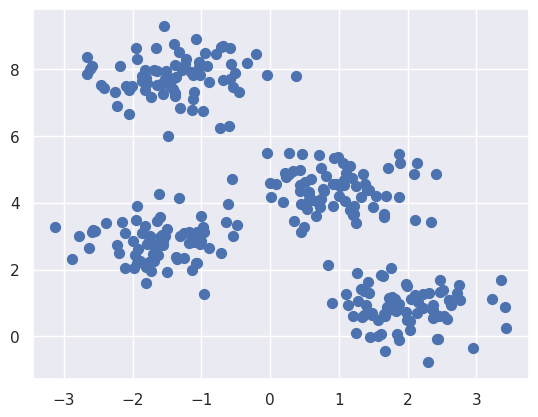

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


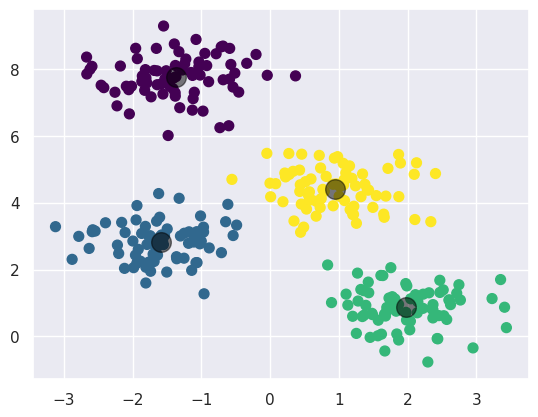

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Classe MiniBatchKMeans

a classe sklearn.cluster.MiniBatchKMeans implementa uma variante do $k$-means mais eficiente, porém menos precisa. Essa variante itera entre duas etapas, semelhante ao k-means clãssico. Na primeira etapa, $b$ amostras são coletadas aleatoriamente do conjunto de dados, para formar um mini-lote. Estes são então atribuídos ao centróide mais próximo. Na segunda etapa, os centróides são atualizados. Ao contrário do k-means, essa segunda etapa é realizada por amostra. Para cada amostra no minilote, o centróide atribuído é atualizado. Essas etapas são executadas até que a convergência ou um número predeterminado de iterações seja alcançado.

O MiniBatchKMeans converge mais rápido que o KMeans, mas a qualidade dos resultados é reduzida. Na prática, essa diferença de qualidade pode ser bem pequena, como ilustra o experimento da figura abaixo ([fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)).

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_mini_batch_kmeans_001.png)



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [6]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [7]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


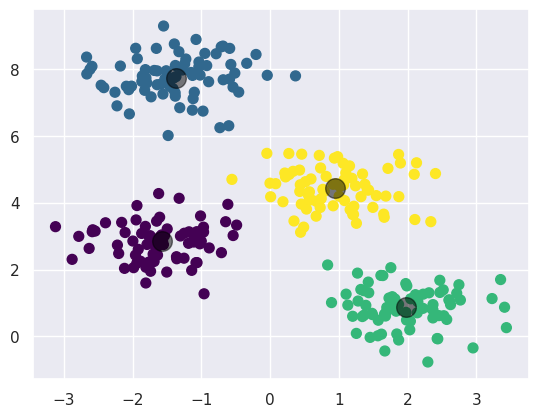

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Limitações

O k-means funciona adequadamente quando os grupos:
* São esféricos
* Bem separados
* Possuem volumes similares
* Possuem quantidades similares de pontos


In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


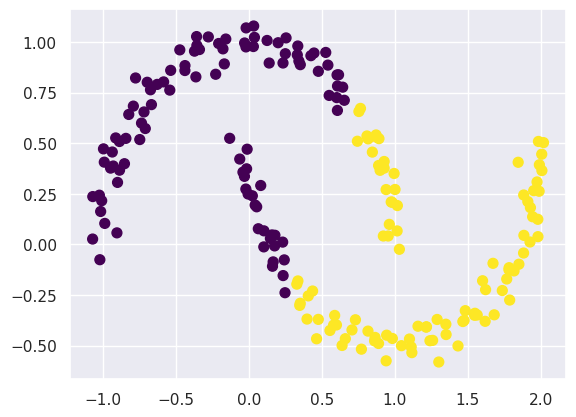

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Análise da silhueta

A análise de silhueta (*silhouette analysis*) pode ser usada para estudar a distância de separação entre os clusters resultantes. O gráfico de silhueta exibe uma medida de quão perto cada ponto em um cluster está dos pontos nos clusters vizinhos e, portanto, fornece uma maneira visual de avaliar parâmetros como o número de clusters. Essa medida tem um intervalo de [-1, 1].

* coeficientes de silhueta próximos a +1 indicam que a amostra está longe dos clusters vizinhos. 
* um valor 0 indica que a amostra está dentro ou muito perto do limite de decisão entre dois clusters vizinhos
* valores negativos indicam que essas amostras podem ter sido atribuídas ao cluster errado.

No Scikit-Learn, a função [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) calcula o coeficiente médio da silhueta de todas as amostras de um conjunto de dados.

O coeficiente de silhueta para uma amostra é calculado usando a distância intra-cluster média ($a$) e a distância média do cluster mais próximo ($b$) para cada amostra, de acordo com a fórmula a seguir:

$$
\frac{b - a}{\max(a, b)} 
$$

Na expressão acima, $b$ é a distância entre a amostra e o cluster mais próximo do qual a amostra não faz parte. O coeficiente da silhueta é definido apenas se o número de grupos $k$ tal que $2 \leq k \leq $ n_samples $- 1$.

Valores do coeficiente variam entre 1 e -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante.

No exemplo de código a seguir ([fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)) , a análise de silhueta é usada para escolher um valor ideal para n_clusters. O gráfico da silhueta mostra que o valor n_clusters de 3, 5 e 6 é uma má escolha para os dados fornecidos devido à presença de clusters com pontuações abaixo da média da silhueta e também devido a grandes flutuações no tamanho dos gráficos da silhueta. A análise de silhueta é mais ambivalente na decisão entre 2 e 4.

Também a partir da espessura do gráfico da silhueta, o tamanho do cluster pode ser visualizado. O gráfico de silhueta para o cluster 0, quando n_clusters é igual a 2, é maior em tamanho devido ao agrupamento dos 3 subclusters em um grande cluster. No entanto, quando n_clusters é igual a 4, todos os gráficos têm mais ou menos espessura semelhante e, portanto, têm tamanhos semelhantes, como também pode ser verificado no gráfico de dispersão rotulado à direita.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5804620679044765
For n_clusters = 6 The average silhouette_score is : 0.4966479110816958


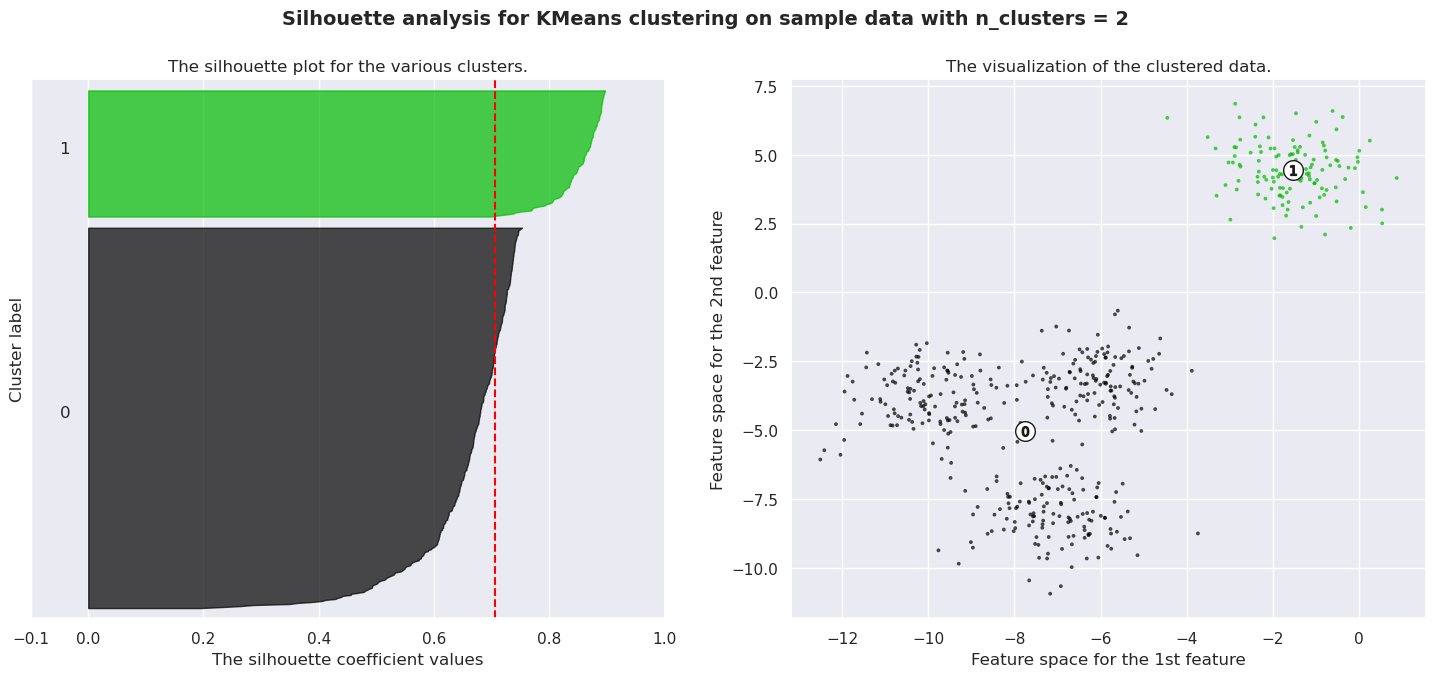

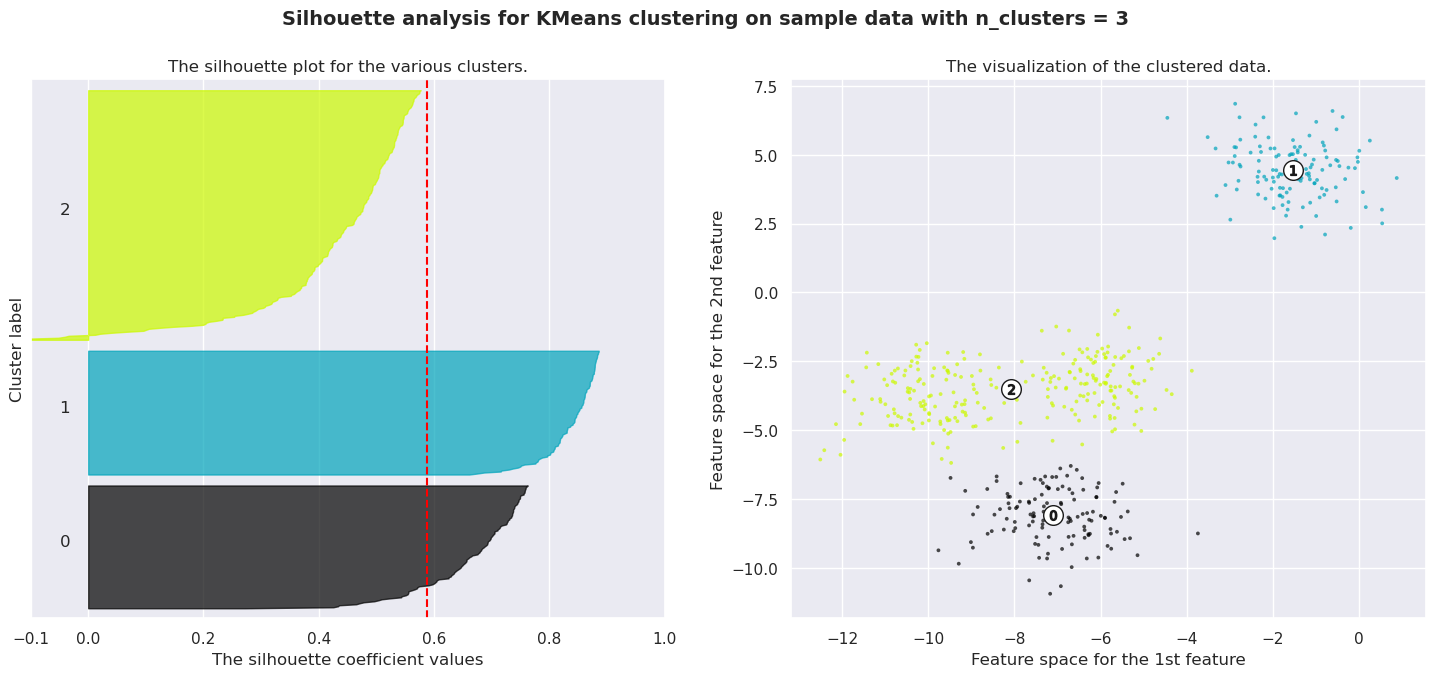

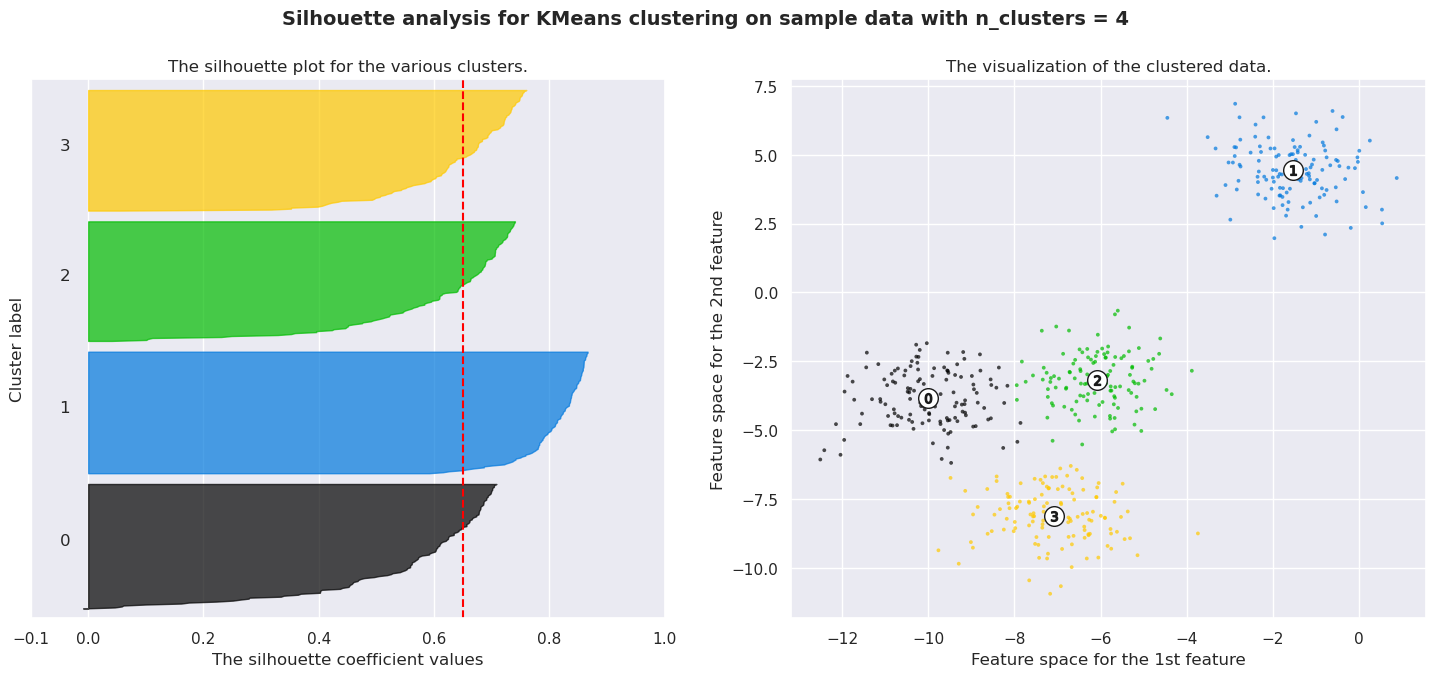

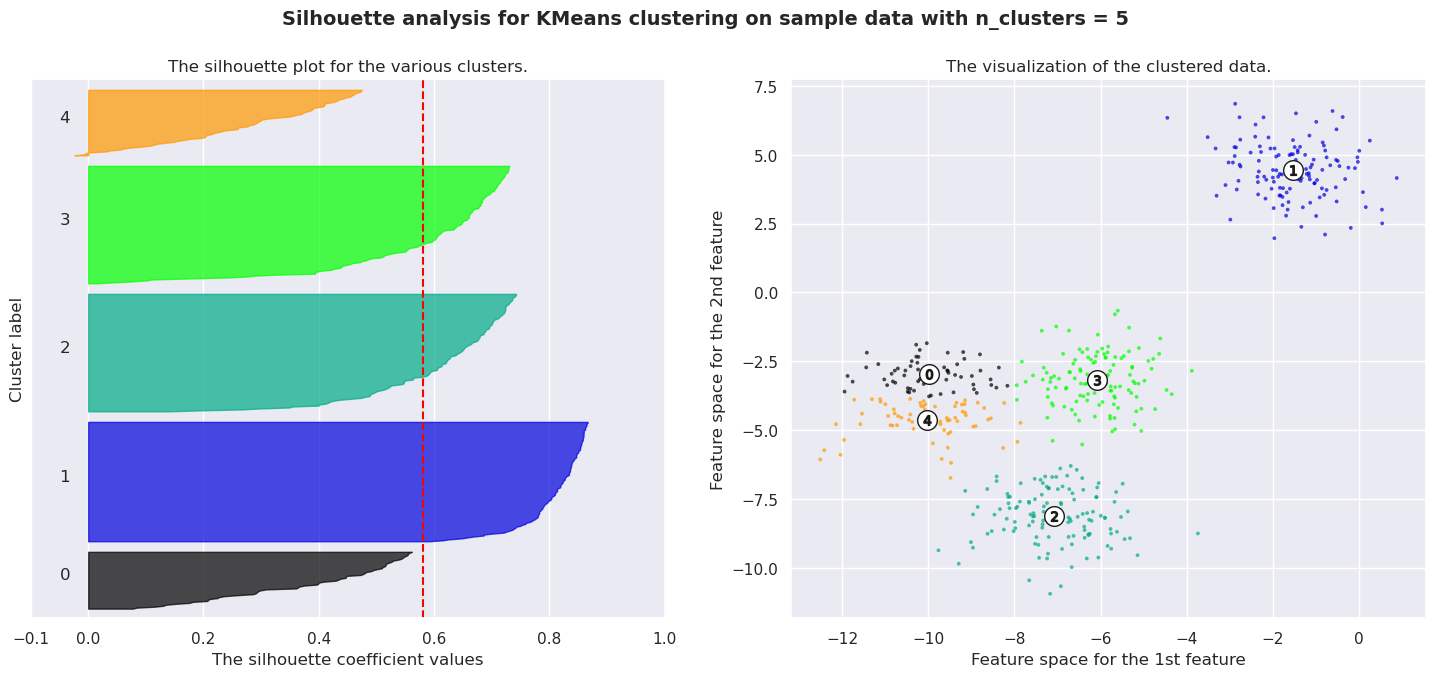

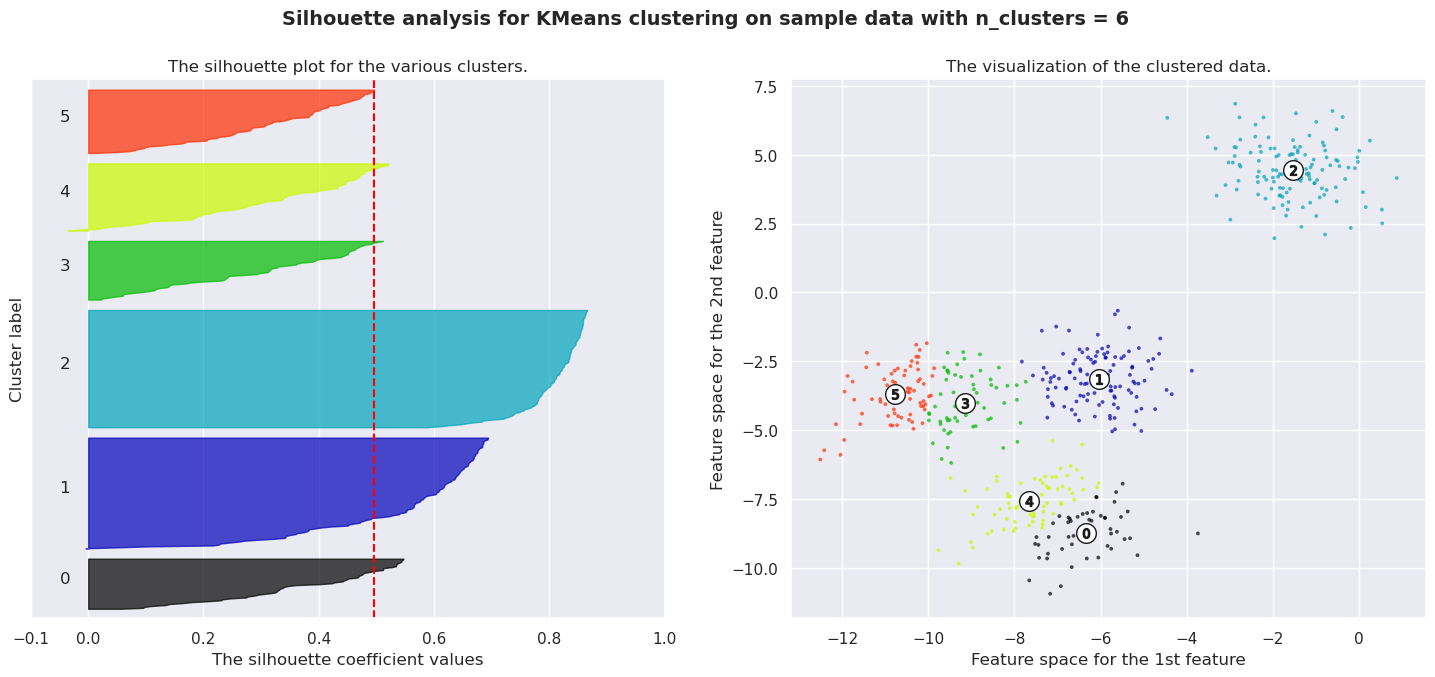

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Hierarchical Agglomerative Clustering

Para gerar um agrupamento, o HAC funciona de forma iterativa. De início, cada ponto é considerado um grupo. A seguir, em cada iteração, esse algoritmo mescla recursivamente o par de grupos que aumenta minimamente uma determinada distância de ligação (*linkage distance*).

### Dendrogramas

O algoritmo HAC gera um agrupamento na forma de um dendrograma. Um dendrograma é uma estrutura em árvore, na qual cada nó representa um grupo. Desta forma, um grupo pode conter outros grupos como componentes. A figura a seguir ([fonte](https://app.displayr.com/Try/Template%20Hierarchical%20Cluster%20Analysis)) apresenta um exemplo ilustrativo de um dendrograma.

![alt text](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/What-is-a-Dendrogram.png)

No exemplo acima, podemos ver que os objetos E e F são muito semelhantes, pois a altura da ligação que os une é a menor. Os próximos dois objetos mais semelhantes são A e B. É também possível inferir do a grande diferença entre os clusters está entre os grupos {A, B} {C, D, E, F}.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.14142135623730953, 0.14142135623730953, 0.0],
  [0.0, 0.14142135623730964, 0.14142135623730964, 0.0],
  [0.14142135623730953,
   1.4142135623730951,
   1.4142135623730951,
   0.14142135623730964]],
 'ivl': ['0', '1', '2', '3'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

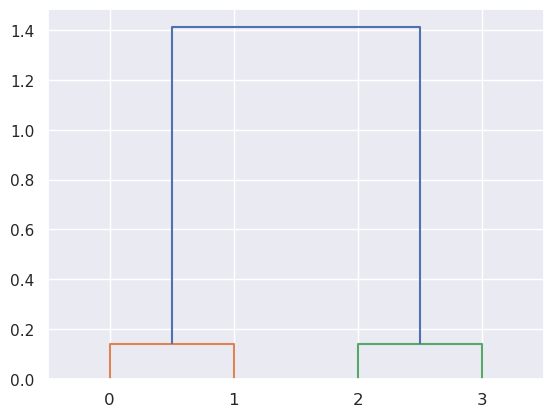

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = [[0., 0.], [0.1, -0.1], [1., 1.], [1.1, 1.1]]

Z = linkage(data)

dendrogram(Z)  

### Classe AgglomerativeClustering

A classe [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) implementa o algoritmo HAC no Scikit-Learn. O valor do parâmetro `linkage` define o critério de ligação. Seus valores são: {"ward" (padrão), "complete", "average", "unique"}. O critério de ligação determina qual medida usar para medir a distância entre dois grupos. O algoritmo HAC mescla os pares de grupos que minimizam esse critério.

* 'ward' minimiza a variância dos grupos que estão sendo mesclados.
* 'complete' ou máxima usa as distâncias máximas entre todas os pontos dos dois conjuntos.
* 'average' usa a média das distâncias de cada ponto dos dois conjuntos.
* 'single' usa o mínimo das distâncias entre todas os pontos dos dois conjuntos.

O exemplo a seguir ([fonte](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)) ilustra o uso da classe 

AgglomerativeClustering()
[1 1 1 0 0 0]


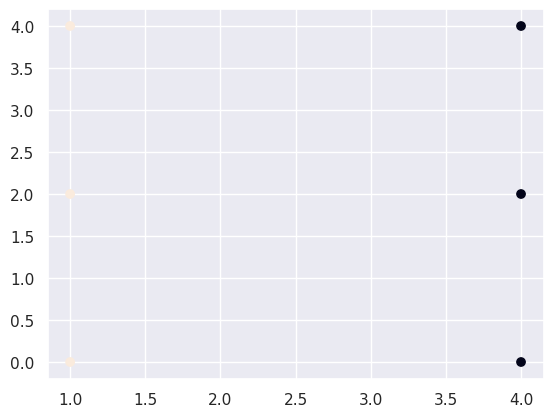

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], 
              [1, 4], 
              [1, 0],
              [4, 2], 
              [4, 4], 
              [4, 0]])
clustering = AgglomerativeClustering().fit(X)
print(clustering)
print(clustering.labels_)

cluster = clustering.labels_
plt.scatter(X[:,0], X[:,1], c = cluster)

No exemplo a seguir, o número de grupos é definido como 2 usando o parâmetro `n_clusters`, enquanto que o parâmetro `affinity` é definido como "euclidian" (ou seja, distância euclidianda entre os pontos será usada). Finalmente, o parâmetro de ligação `linkage` é definido como "ward", o que minimiza a variância entre os grupos que são mesclados.

In [14]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

O código a seguir ([fonte](https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py)) constrói um dendrograma a partir dos exemplos do conjunto de dados Iris.

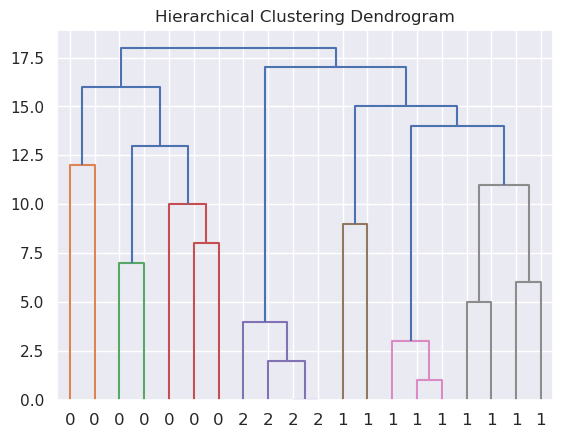

In [15]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()


## DBSCAN

O algoritmo DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) captura a percepção de que um cluster é um conjunto denso de pontos espacialmente próximos. A idéia é que, se um ponto específico pertencer a um cluster, ele deve estar próximo a muitos outros pontos nesse mesmo cluster.

O DBSCAN possui dois (hiper)parâmetros:
* $\epsilon \in \Re$
* minPoints $\in Z$ 

No início de sua execução, o DBSCAN seleciona aleatoriamente um ponto $p$ do conjunto de dados. Se houver mais do que minPoints pontos a uma distância até epsilon de $p$ (incluindo o próprio ponto original), o DBSCAN considera todos eles como parte de um "cluster". Em seguida, esse cluster é expandido verificando todos os novos pontos e verificando se eles também têm mais de pontos minPoints a uma distância de epsilon, aumentando o cluster de forma recursiva.

Eventualmente, não haverá mais pontos para adicionar ao cluster. Nesse momento, o DBSCAN escolhe um novo ponto arbitrário e repete o processo. 

Pode acontecer de o ponto $p$ selecionado ter menos que pontos minPoints em sua "bola" de raio épsilon e também não faça parte de nenhum outro cluster. Se for esse o caso, $p$ é considerado um "ponto de ruído" que não pertence a nenhum cluster.

O link a seguir ilustra de forma visual o comportamento do DBSCAN durante a execução: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

[fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)

In [16]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Medidas de avaliação (externas e internas)

Geralmente, as medidae de avaliação de agrupamentos podem ser categorizadas:

* Validação interna, que usa as informações internas do processo de clustering para avaliar a qualidade de uma estrutura de clustering sem referência a informações externas. 
* Validação externa, que consiste em comparar os resultados de uma análise de cluster com um resultado conhecido, como rótulos de classe fornecidos externamente. Esse tipo de medida mede até que ponto os rótulos de cluster correspondem aos rótulos de classe fornecidos externamente.

### Índice Rand ajustado

Dados o conhecimento das atribuições verdadeiras da classe no parâmetros labels_true e as atribuições do algoritmo de agrupamento das mesmas amostras labels_pred, o índice Rand ajustado (*adjusted rand index*, ARI) é uma função que mede a semelhança das duas atribuições, ignorando permutações e com a normalização do acaso.

As principais características dessa medida são as seguintes:

* As atribuições de etiqueta aleatórias (uniformes) têm uma pontuação no ARI próxima de 0,0 para qualquer valor de n_clusters e n_samples.
* Intervalo limitado [-1, 1]: valores negativos indicam agrupamentos ruins, agrupamentos consistente com o rotulamento padrão têm um ARI positivo; 1,0 é a pontuação de correspondência perfeita.
* Nenhuma suposição é feita sobre a estrutura do cluster; consequentemente essa medida pode ser usada para comparar diferentes  algoritmos de agrupamento.

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_rand_score(labels_true, labels_pred)  

In [ ]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_rand_score(labels_true, labels_pred) 

Um agrupamento ruim produz um valor negativo ou próximo de zero dessa medida.

In [ ]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)  

### Homogeneidade

Métrica de homogeneidade de uma rotulagem de cluster, tomando como base um rotulamento padrão (*ground truth*).

Um agrupamento satisfaz tem alta homogeneidade se todos os seus clusters contiverem apenas pontos de dados que são membros de uma única classe.

Essa métrica é independente dos valores absolutos dos rótulos: uma permutação dos valores dos rótulos de classe ou cluster não altera o valor da pontuação de forma alguma.

No Scikit-Learn, a função [homogeneity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) implementa a medida de homogeneidade. Essa função produz uma valor entre 0.0 e 1.0, sendo que este último corresponde a um agrupamento maximamente consistente com o rotulamento padrão.

Um rotulação completamente consistente com o rotulamento padrão tem homogeneidade máxima:

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

As rotulações não perfeitas que dividem ainda mais as classes em mais clusters podem ser perfeitamente homogêneas:

In [ ]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

Clusters que incluem exemplos de diferentes classes não oferecem uma rotulação homogênea:

In [ ]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()